In [232]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import flash_PBeta


In [233]:
reload(flash_PBeta)
from flash_PBeta import flash_PBeta

Tc = np.array([304.1, 562, 305.3, 513.9, 190.555]) #K
Pc = np.array([73.8e5,  48.9e5, 48.714e5, 61.4e5, 45.95e5]) #Pa
w = np.array([0.239,  0.212, 0.099, 0.644, 0.008]) #dimensionless

kij = np.array([[0,0,0,0,0.0919],
                [0,0,0,0,0],
                [0,0,0,0,0],
                [0,0,0,0,0],
                [0.0919,0,0,0,0],]) #dimensionless

In [255]:
T=283.
P=30e5
z = np.array([0.5, 0.0, 0.00, 0.00, 0.5])

#P_grid = np.linspace(5e5,90e5,500)
P_grid = np.zeros(1000)
iterations = np.zeros(1000)
BETA = 0.90
T_guess = 100

P_grid[0] = 5e5
P_grid[1] = 5.5e5

delta_T = 2

x = np.zeros([1000,5])
y = np.zeros([1000,5])
T = np.ones(1000)*200

K = np.exp(np.log(Pc/P)+5.373*(1.+w)*(1.-Tc/T_guess))


ans = flash_PBeta(T_guess,P_grid[0],z,BETA,K)
x[0,:] = ans[0]
y[0,:] = ans[1] 
K_old_old = ans[2]
T[0] = ans[3]
iterations[0] = ans[4]

T_guess = T[0]

ans = flash_PBeta(T_guess,P_grid[1],z,BETA,K_old_old)
x[1,:] = ans[0]
y[1,:] = ans[1] 
K_old = ans[2]
T[1] = ans[3]
iterations[1] = ans[4]

T_guess = T[1]

In [256]:
for i in range(len(P_grid)-2):
    P_grid[i+2] = P_grid[i+1] + (P_grid[i+1] - P_grid[i])*(delta_T*(5/(i+1)/(T[i+1]-T[i])))
    K = K_old + (K_old - K_old_old)*delta_T*(3.5/(i+1))/(T[i+1]-T[i])
    ans = flash_PBeta(T_guess,P_grid[i+2],z,BETA,K)
    x[i+2,:] = ans[0]
    y[i+2,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T[i+2] = ans[3]
    iterations[i+2] = ans[4]
    T_guess = T[i+2]
     
    print(P_grid[i+2],T[i+2],np.log(K_old),iterations[i+2])

830189.980632 208.847465173 [ -0.78088896  -9.49634984  -0.6175249  -11.05045382   3.14481231] 8.0
1003380.79777 212.784090456 [ -0.77495283  -9.20312638  -0.65103186 -10.61213027   2.96535308] 8.0
1150029.94069 215.703752406 [ -0.76989754  -8.98242053  -0.67352694 -10.28857279   2.8346111 ] 8.0
1275600.25107 217.969769094 [ -0.76553969  -8.80861421  -0.68956528 -10.03762297   2.73431381] 8.0
1386429.36459 219.821572767 [-0.7616667  -8.66460423 -0.70172445 -9.83225714  2.65300245] 8.0
1486178.16189 221.386086755 [-0.75815687 -8.54133659 -0.71131509 -9.65830511  2.58469742] 8.0
1577259.66259 222.74004758 [-0.75493036 -8.43332957 -0.71909743 -9.50726943  2.52583164] 9.0
1661347.6759 223.933185348 [-0.75193196 -8.33702436 -0.72554719 -9.373677    2.47411779] 9.0
1739654.74855 224.999527746 [-0.74912182 -8.24998084 -0.73097995 -9.25380088  2.4280045 ] 9.0
1813089.95363 225.963363733 [-0.74647011 -8.17045329 -0.73561476 -9.14499101  2.38639259] 9.0
1882354.10043 226.842628094 [-0.74395385 -

KeyboardInterrupt: 

In [403]:
plt.scatter(T,P_grid)
plt.ylim(0,1e7)
plt.show()

ValueError: x and y must be the same size

In [405]:
T=283.
P=30e5
z = np.array([0.5, 0.0, 0.00, 0.00, 0.5])

#P_grid = np.linspace(5e5,90e5,500)
P_grid2 = np.zeros(640)
iterations2 = np.zeros(640)
BETA = 0.10
T_guess = 100

P_grid2[0] = 5e5
P_grid2[1] = 5.5e5

delta_T = 2

x2 = np.zeros([640,5])
y2 = np.zeros([640,5])
T2 = np.ones(640)*200

K = np.exp(np.log(Pc/P)+5.373*(1.+w)*(1.-Tc/T_guess))


ans = flash_PBeta(T_guess,P_grid2[0],z,BETA,K)
x2[0,:] = ans[0]
y2[0,:] = ans[1] 
K_old_old = ans[2]
T2[0] = ans[3]
iterations2[0] = ans[4]

T_guess = T2[0]

ans = flash_PBeta(T_guess,P_grid2[1],z,BETA,K_old_old)
x2[1,:] = ans[0]
y2[1,:] = ans[1] 
K_old = ans[2]
T2[1] = ans[3]
iterations2[1] = ans[4]

T_guess = T2[1]

In [406]:
for i in range(len(P_grid2)-2):
    P_grid2[i+2] = P_grid2[i+1] + (P_grid2[i+1] - P_grid2[i])*(delta_T*(9/(i+1)/(T2[i+1]-T2[i])))
    K = K_old + (K_old - K_old_old)*delta_T*(9/(i+1))/(T2[i+1]-T2[i])
    ans = flash_PBeta(T_guess,P_grid2[i+2],z,BETA,K)
    x2[i+2,:] = ans[0]
    y2[i+2,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T2[i+2] = ans[3]
    iterations2[i+2] = ans[4]
    T_guess = T2[i+2]
     
    print(P_grid2[i+2],T2[i+2],np.log(K_old),iterations2[i+2])




990079.953659 148.828680595 [ -4.34336698 -17.78034787  -4.59830414 -20.70465582   0.80189603] 4.0
1268679.24319 155.805885631 [ -3.89249362 -16.30190319  -4.16584216 -18.82349593   0.79673904] 4.0
1508258.8067 161.091493663 [ -3.57686238 -15.24376516  -3.85844643 -17.49207042   0.79145771] 4.0
1712229.29209 165.21185397 [ -3.34471517 -14.45169529  -3.62971462 -16.50396732   0.78635147] 4.0
1890440.34468 168.585098025 [ -3.16301282 -13.82275501  -3.44904013 -15.72473562   0.7814331 ] 4.0
2048932.62958 171.436482802 [ -3.01491626 -13.30383914  -3.30067244 -15.08547794   0.7767012 ] 4.0
2191863.73904 173.904059634 [ -2.8906061  -12.86361592  -3.17534434 -14.54580083   0.77214473] 4.0
2322191.99961 176.07796103 [ -2.78392017 -12.48223022  -3.06719707 -14.08023906   0.76775039] 4.0
2442094.64173 178.020128613 [ -2.69076162 -12.14636923  -2.97231077 -13.67179407   0.76350499] 4.0
2553220.35393 179.774891486 [ -2.60828073 -11.84670277  -2.88794365 -13.30859888   0.75939631] 4.0
2656848.07327

In [484]:
BETA = 0.9
T = np.ones(1000)*200
P_grid = np.zeros(1000)

#K_old = np.exp(-np.log(K))
K_old = np.exp([-0.02190654, -0.1459381,  -0.02699198, -0.15171195,  0.02152922])

P_grid[0] = 1.00*P_grid2[len(P_grid2)-1]#- (P_grid2[i+1] - P_grid2[i])*(delta_T*(9/(i+1)/(T2[i+1]-T2[i])))
K = K_old#K_old + (K_old - K_old_old)*delta_T*(9/(i+1))/(T2[i+1]-T2[i])
print(K_old,np.log(K),'antes do flash',P_grid[0],P_grid2[i+1],BETA)
ans = flash_PBeta(256,P_grid[0],z,BETA,K)
print('depois do flash',ans)
x[0,:] = ans[0]
y[0,:] = ans[1]
K_old_old = K_old
K_old = ans[2]
T[0] = ans[3]
iterations[0] = ans[4]
T_guess = T[0]

print(T[0],P_grid[0],K_old,np.log(K_old))

[ 0.97833167  0.8642112   0.97336905  0.85923575  1.02176265] [-0.02190654 -0.1459381  -0.02699198 -0.15171195  0.02152922] antes do flash 8622554.0104 8621586.7638 0.9
depois do flash (array([ 0.56561307,  0.        ,  0.        ,  0.        ,  0.43438693]), array([ 0.49270966,  0.        ,  0.        ,  0.        ,  0.50729034]), array([ 0.87110725,  0.37896547,  0.8425722 ,  0.36577573,  1.16783061]), 256.9888468605285, 500)
256.988846861 8622554.0104 [ 0.87110725  0.37896547  0.8425722   0.36577573  1.16783061] [-0.13799017 -0.97031017 -0.17129592 -1.0057349   0.15514785]


In [485]:
P_grid[1] = P_grid[0] -0.5e5#- (P_grid[0] - P_grid2[i+1])*(delta_T*(9/(i+1)/(T[0]-T2[i+1])))
K = np.exp([-0.02190654, -0.1459381,  -0.02699198, -0.15171195,  0.02152922]) #+ (K_old - K_old_old)*delta_T*(9/(i+1))/(T[0]-T2[i+1])
print('antes do flash')
ans = flash_PBeta(255.9624,P_grid[1],z,BETA,K)
print('depois do flash',ans)
x[1,:] = ans[0]
y[1,:] = ans[1]
K_old_old = K_old 
K_old = ans[2]
T[1] = ans[3]
iterations[1] = ans[4]
T_guess = T[1]

print(T[1],P_grid[1],K_old)

antes do flash
depois do flash (array([ 0.5839529,  0.       ,  0.       ,  0.       ,  0.4160471]), array([ 0.4906719,  0.       ,  0.       ,  0.       ,  0.5093281]), array([ 0.84025936,  0.28924227,  0.80547409,  0.27655666,  1.22420783]), 257.66587250722284, 336)
257.665872507 8572554.0104 [ 0.84025936  0.28924227  0.80547409  0.27655666  1.22420783]


In [463]:
P_grid[2] = P_grid[1] - (P_grid[1] - P_grid[0])*(delta_T*(5*(0+1)/(i+1))/(T[1]-T[0]))
#K = K_old + (K_old - K_old_old)*delta_T*(9*(0+1)/(i+1))/(T[1]-T[0])
print(P_grid[2])

8573711.57225


In [486]:
for k in range(len(P_grid)-2):
    P_grid[k+2] = P_grid[k+1] - abs((P_grid[k+1] - P_grid[k])*(delta_T*(20/(i+1))/(T[k+1]-T[k])))
    K = K_old + (K_old - K_old_old)*delta_T*(15/(i+1))/(T[k+1]-T[k])
#    print('antes do flash',P_grid[k+2],P_grid[k+1],P_grid[k],T[k+1],T[k],T_guess,K)
    ans = flash_PBeta(T_guess,P_grid[k+2],z,BETA,K)
    x[k+2,:] = ans[0]
    y[k+2,:] = ans[1]
    K_old_old = K_old 
    K_old = ans[2]
    T[k+2] = ans[3]
    iterations[k+2] = ans[4]
    T_guess = T[k+2]
     
    print(P_grid[k+2],T[k+2],np.log(K_old),iterations[k+2])

8567923.763 257.712343038 [-0.17670694 -1.26075187 -0.21965164 -1.30630825  0.20590288] 92.0
8561676.84397 257.772231451 [-0.18018206 -1.28726594 -0.22399536 -1.33374875  0.21064123] 107.0
8555137.07531 257.83177432 [-0.18368914 -1.31410085 -0.22837943 -1.36152217  0.21545511] 103.0
8548250.99722 257.891307266 [-0.18725074 -1.34143274 -0.23283202 -1.38981101  0.22037702] 100.0
8540999.06264 257.950816124 [-0.19086944 -1.36928605 -0.23735635 -1.41864078  0.22541251] 96.0
8533358.74222 258.01029445 [-0.19454877 -1.39769269 -0.24195677 -1.44804476  0.23056858] 93.0
8525305.10334 258.069735659 [-0.19829256 -1.42668749 -0.24663804 -1.47805929  0.23585289] 90.0
8516810.48584 258.129132231 [-0.20210507 -1.45630932 -0.25140545 -1.50872492  0.241274  ] 87.0
8507844.01041 258.188475898 [-0.20599113 -1.48660191 -0.25626497 -1.54008724  0.24684151] 85.0
8498371.02887 258.247757855 [-0.20995607 -1.51761377 -0.26122321 -1.57219689  0.25256608] 82.0
8488352.51099 258.306967635 [-0.21400599 -1.5494002

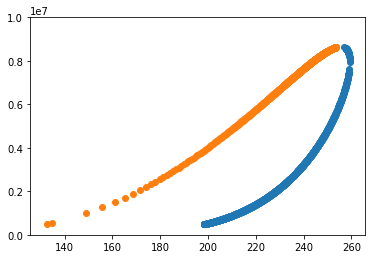

In [487]:
plt.scatter(T,P_grid)
plt.scatter(T2,P_grid2)

plt.ylim(0,1e7)
plt.show()

(1640,)
(1640,)


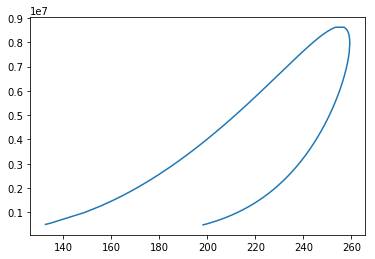

In [488]:
tall=np.concatenate(np.array([T2,T]),0)
print(tall.shape)
pau=np.concatenate(np.array([P_grid2,P_grid]),0)
print(pau.shape)
plt.plot(tall,pau)
plt.show()

In [ ]:
#